In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [11]:
from exp.nb_datablock import *
from exp.nb_metrics import *
from exp.nb_train import *

In [3]:
seed_everything(42)

In [4]:
dls = get_data(42, 32, 512, fold=0)

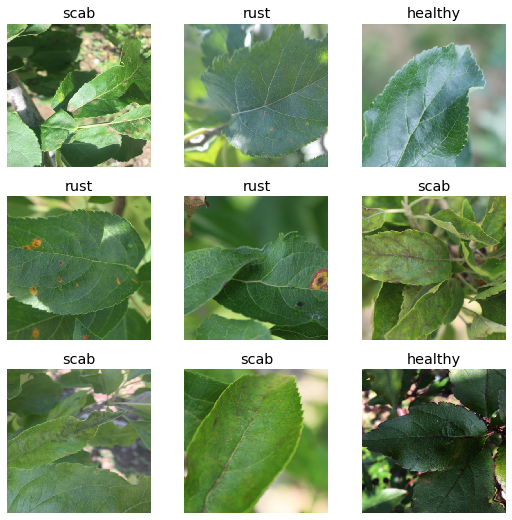

In [5]:
dls.show_batch()

In [6]:
data = [get_data(42, 32, 512, i) for i in range(5)]

In [7]:
ARCH = densenet121

In [12]:
def get_learner(fold_num, lr=1e-3):
    opt_func = partial(Adam, lr=lr, wd=0.01, eps=1e-8)

    learn = cnn_learner(
        data[fold_num], ARCH, opt_func=opt_func,
        loss_func=LabelSmoothingCrossEntropy(),
        metrics=[
            AccumMetric(healthy_roc_auc, flatten=False),
            AccumMetric(multiple_diseases_roc_auc, flatten=False),
            AccumMetric(rust_roc_auc, flatten=False),
            AccumMetric(scab_roc_auc, flatten=False),
            AccumMetric(comp_metric, flatten=False)]
        )

    return learn

@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0012022644514217973)

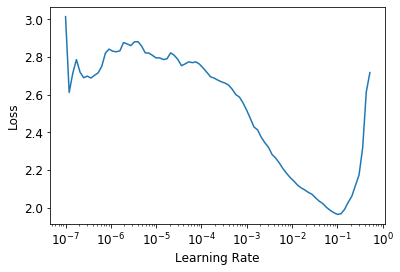

In [9]:
get_learner(fold_num=0).lr_find()

In [ ]:
train(get_learner, 5, 'densnet_model_')

@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.463933,0.758901,0.960794,0.641691,0.959188,0.941158,0.875708,11:38
1,1.191722,0.674137,0.979137,0.840378,0.981371,0.956838,0.939431,11:10
2,1.019196,0.646727,0.952346,0.847743,0.989407,0.976120,0.941404,11:00
3,0.887701,0.643984,0.974431,0.848383,0.990038,0.970665,0.945879,11:13


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,0.778349,0.636537,0.978137,0.848543,0.989772,0.972243,0.947174,12:29
1,0.797063,0.609295,0.981250,0.845821,0.990171,0.975262,0.948126,12:24
2,0.772303,0.600445,0.984399,0.861511,0.990436,0.976257,0.953151,12:37
3,0.768930,0.582898,0.988364,0.847582,0.991466,0.983977,0.952847,12:44


In [12]:
all_val_preds, all_val_labels = validate(get_learner, 5,'densnet_model_' )

@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


In [13]:
print_metrics(np.concatenate(all_val_preds), np.concatenate(all_val_labels))

Comp metric: 0.9224076166313324
Healthy metric: 0.9628055481303276
Multi disease: 0.7871816045226452
Rust metric: 0.9751561456626503
Scab metric: 0.9644871682097068


In [10]:
test_df = pd.read_csv('data/test.csv')

In [14]:
all_test_preds = test(dls,test_df,  get_learner, 5, 'densnet_model_')

@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


In [15]:
test_df_output = pd.concat([test_df, pd.DataFrame(np.mean(np.stack(all_test_preds), axis=0), columns=LABEL_COLS)], axis=1)

In [16]:
test_df_output.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.231827,0.033415,0.725564,0.009194
1,Test_1,0.239799,0.106895,0.485277,0.168028
2,Test_2,0.684451,0.013317,0.011940,0.290292
3,Test_3,0.941259,0.001671,0.052756,0.004314
4,Test_4,0.008047,0.032764,0.937679,0.021510


In [17]:
test_df_output.to_csv('submission_densenet.csv', index=False)